### Strategic practice 1 (SP1)

I've borrowed the term 'Strategic Practice' from Prof. Joseph Blitzstein, who teaches a fantastic and deservedly famous class in Statistics at Harvard. The term 'Homework' just smacks of drudgery to me, and lacks the aspirational flavor I'm going for. 'Problems' are very important, and are opportunities for real growth, but I think of them more as being about creativity, and the deep integration of ideas and approaches across different domains. We're not quite there yet. 'Strategic practice' places the emphasis on gaining more familiarity with the fundamental skills and idioms that will be needed for more interesting problems later on.

### Setup and Background

You'll want to open up a Jupyter notebook and run the following block of code. This imports libraries you'll need to do SP1, as well as a toy dataset that we'll be using. 'Toy' is not meant disparagingly -- it just refers to the fact that the dataset is clean, not too huge, used often as a standard, and good for illustrating certain themes. 'Real' data is usually a gnarled and terrifying mess (at least at first), and aspires to be like a toy dataset ;-) 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
mpg = sns.load_dataset('mpg')

Let's take a quick look at what we've got: 

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


As you can see, it's a pandas dataframe with information about cars. Each row is a particular car, and for each car we have numerical measurements about its fuel economy, weight, horsepower, etc. We also have some 'label-like' information for each car ('origin', 'name', etc). Let's get started! 

```{admonition} Question 1
:class: seealso
Create a markdown cell in your jupyter notebook. In that cell, write down two analyses or queries you think would be interesting to perform on this dataset (just in plain language, not code). Then, briefly describe what you think you might find, just based on intuition or prior knowledge.

For example: "It would be interesting to look at the relationship between _ and _. My hunch is that ____."
```

```{admonition} Question 2
:class: seealso
Which of the features in the mpg dataframe are *categorical variables*? (There may be more than one). Give a definition of a categorical variable. Enter your answer in a markdown cell. 
```

### Practice with Pandas: histograms, scatterplots, correlation

Did you ever wonder how many cylinders cars have, on average? Of course you have. The answer, at least according to this dataset, is 5.45 cylinders. That's a nice summary measure, but it doesn't tell us about the relative proportions of 4 vs. 5 vs. 6 vs. 8 cylinder cars. We might want to know about the **distribution** of cylinders, which we can get a better sense of through a **histogram**. 

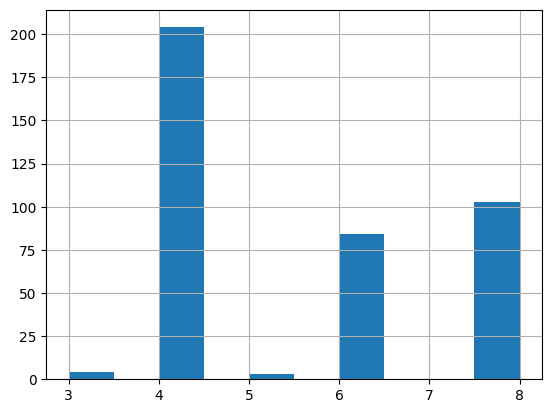

In [7]:
mpg['cylinders'].hist();

The histogram is reporting the number of cars with a certain number of cylinders. Looks like most cars have 4. Interestingly, it seems there are very very few cars with an odd number of cylinders.

```{admonition} Question 3
:class: seealso
 - Extract the 'weight' column from the mpg dataframe, and construct a histogram, as above. Interpret. 
 - Look at pandas documentation as needed to figure out how to change the number of bins in the histogram. Then, show another histogram of the same data, but with 60 bins instead of the default number of bins. What is evident about the data in this histogram that was harder to appreciate in your first histogram?
```

```{admonition} Question 4
:class: seealso
 - Make a new dataframe, called mpg2 that consists of only the following colummns of the mpg dataset: displacement, horsepower, weight, and mpg. You may need to consult an earlier chapter for an example where we grabbed multiple columns.
 - Create a 4 x 4 scatter matrix of mpg2 (consult the earlier notebook).
 - Looking at the scatter matrix, discuss which variables you think are positively correlated, and which you think are negatively correlated. 
```

```{admonition} Question 5
:class: seealso
 - Construct a correlation matrix for the dataframe mpg2 (see the earlier notebook). Explain the relationship between this matrix, and the scattermatrix you made above. 
```

### Practice with Pandas: Grouping, and working with categorical data

Recall what the dataset looked like: 

In [3]:
mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Each row is a single car (chevy malibu, ford torino, etc), but maybe there are multiple rows that correspond to the same **kind** of car. For example, maybe there are a few different rows of data that are all ford torinos, and are just models from different years. Pandas' 'groupby' command allows us to split up our data into meaningful groups, and lets you grab all the data that are of the same kind. For example, if I wanted to group the data by car name, and then count the number of cars in each group, here's how you would do that: 

In [7]:
mpg.groupby(by=['name']).count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
amc ambassador brougham,1,1,1,1,1,1,1,1
amc ambassador dpl,1,1,1,1,1,1,1,1
amc ambassador sst,1,1,1,1,1,1,1,1
amc concord,2,2,2,2,2,2,2,2
amc concord d/l,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
vw dasher (diesel),1,1,1,1,1,1,1,1
vw pickup,1,1,1,1,1,1,1,1
vw rabbit,2,2,2,2,2,2,2,2


Looks like there's 2 VW rabbits in the data set, and 2 amc concords. For each of the other cars (at least in this small snippet of the data), there's only one of each in the dataset. 

```{admonition} Question 6
:class: seealso
 - Write a very similar statement to the above that groups the data not by car name, but by country of origin, and calculates not the count of each feature, but the mean of each feature.
 - Based on the query you just ran, do the data support the claim that, relative to Europeans, Americans like heavy cars, with lots of horsepower, and which get few miles to the gallon?
```

### Plotting with Seaborn

Look at [this example](https://seaborn.pydata.org/examples/grouped_barplot.html) from the Seaborn Gallery of how to make a 'category plot' (which is basically just a multi-group bar plot). 

```{admonition} Question 6
:class: seealso
 - Make a similar category plot using the car data we've been working with, and show the relationship between miles per gallon and country of origin, broken down by year. 
 - Make 2 observations about the data that are clearly visible from the category plot. 
```

### A little bit of Numpy practice

Recall that pandas objects are called 'dataframes'. We can pull out columns from pandas dataframe, and turn them into numpy arrays with a command like this:

In [14]:
array = mpg[['horsepower', 'model_year']].to_numpy()
array

array([[130.,  70.],
       [165.,  70.],
       [150.,  70.],
       [150.,  70.],
       [140.,  70.],
       [198.,  70.],
       [220.,  70.],
       [215.,  70.],
       [225.,  70.],
       [190.,  70.],
       [170.,  70.],
       [160.,  70.],
       [150.,  70.],
       [225.,  70.],
       [ 95.,  70.],
       [ 95.,  70.],
       [ 97.,  70.],
       [ 85.,  70.],
       [ 88.,  70.],
       [ 46.,  70.],
       [ 87.,  70.],
       [ 90.,  70.],
       [ 95.,  70.],
       [113.,  70.],
       [ 90.,  70.],
       [215.,  70.],
       [200.,  70.],
       [210.,  70.],
       [193.,  70.],
       [ 88.,  71.],
       [ 90.,  71.],
       [ 95.,  71.],
       [ nan,  71.],
       [100.,  71.],
       [105.,  71.],
       [100.,  71.],
       [ 88.,  71.],
       [100.,  71.],
       [165.,  71.],
       [175.,  71.],
       [153.,  71.],
       [150.,  71.],
       [180.,  71.],
       [170.,  71.],
       [175.,  71.],
       [110.,  71.],
       [ 72.,  71.],
       [100.,

Note that this is a 2 dimensional array, with a bunch of rows and 2 columns. 

```{admonition} Question 7
:class: seealso
Run the bit of code below, and describe what it is returning. What are the dimensions of what is returned? 
```

In [19]:
slice1 = array[4,:]

```{admonition} Question 8
:class: seealso
Run the bit of code below, and describe what it is returning. What are the dimensions of what is returned? 
```

In [18]:
slice2 = array[:,1]

Remember that the numpy function, where() was useful for asking where certain conditions were met in an array. 

```{admonition} Question 9
:class: seealso
Use the numpy where function, as well as one of the results above, to find the array indices of cars that were made after 1974
```